# SWIGGY SALES ANALYSIS

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_excel("C:/Users/AKENDRA/Downloads/swiggy_data.xlsx")

In [4]:
df.head()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0
1,Karnataka,Bengaluru,2025-04-03,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,2025-01-15,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,2025-04-17,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,2025-03-13,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,4.0,0


In [5]:
df.tail()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
197425,Sikkim,Gangtok,2025-01-25,Mama's Kitchen,Gangtok,Momos,Soya cheese chilli momo ...,112.0,4.4,0
197426,Sikkim,Gangtok,2025-07-02,Mama's Kitchen,Gangtok,Momos,Kurkure momo fried ...,140.0,4.4,0
197427,Sikkim,Gangtok,2025-03-25,Mama's Kitchen,Gangtok,Momos,Chilli cheese momo,126.0,4.4,0
197428,Sikkim,Gangtok,2025-03-26,Mama's Kitchen,Gangtok,Momos,Veg Momos (8 Pc),85.0,4.4,0
197429,Sikkim,Gangtok,2025-03-27,Mama's Kitchen,Gangtok,Momos,Soya Momo,100.0,4.4,0


### Metadata

In [6]:
print("No of Rows:",df.shape[0])

No of Rows: 197430


In [7]:
print("No of field:",df.shape[1])     ##It prints the number of columns (fields) in a DataFrame called df.

No of field: 10


In [8]:
df.info()        ## information of datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197430 entries, 0 to 197429
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   State            197430 non-null  object        
 1   City             197430 non-null  object        
 2   Order Date       197430 non-null  datetime64[ns]
 3   Restaurant Name  197430 non-null  object        
 4   Location         197430 non-null  object        
 5   Category         197430 non-null  object        
 6   Dish Name        197430 non-null  object        
 7   Price (INR)      197430 non-null  float64       
 8   Rating           197430 non-null  float64       
 9   Rating Count     197430 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 15.1+ MB


### Data Types

In [9]:
df.describe()     ##gives a quick statistical summary of numeric columns in your DataFrame.it count numerical amd blank values

,Order Date,Price (INR),Rating,Rating Count
count,197430,197430.000000,197430.000000,197430.000000
mean,2025-05-01 19:41:20.996808960,268.512920,4.341582,28.321805
min,2025-01-01 00:00:00,0.950000,1.500000,0.000000
25%,2025-03-01 00:00:00,139.000000,4.300000,0.000000
50%,2025-05-02 00:00:00,229.000000,4.400000,2.000000
75%,2025-07-01 00:00:00,329.000000,4.500000,15.000000
max,2025-08-31 00:00:00,8000.000000,5.000000,999.000000
std,NaN,219.338363,0.422585,87.542593


In [10]:
df.dtypes    ##Displays the data type of every column/field in the DataFrame.

State                      object
City                       object
Order Date         datetime64[ns]
Restaurant Name            object
Location                   object
Category                   object
Dish Name                  object
Price (INR)               float64
Rating                    float64
Rating Count                int64
dtype: object

# KPI's

### Total Sales

In [11]:
Total_Sales = df["Price (INR)"].sum()
print("Total Sales (INR):", round(Total_Sales,2))  ## ROUND is used to round a number to a specified number of decimal places.

Total Sales (INR): 53012505.77


# Average Rating

In [12]:
average_rating = df["Rating"].mean()     ## mean will gives average values
print("Average rating (INR):", round(average_rating,2))

Average rating (INR): 4.34


# Average Order Values

In [13]:
avg_order_value = df["Price (INR)"].mean()
print("Avg order value (INR):", round(avg_order_value,2))

Avg order value (INR): 268.51


# Ratings Counts

In [15]:
Ratings_Count = df["Rating Count"].sum()
print("Ratings Count:", round(Ratings_Count,2))

Ratings Count: 5591574


# Total Order

In [17]:
Total_Orders = len(df)
print("Total orders:", round(Total_Orders,2))

Total orders: 197430


# CHARTS Designs

### Monthly Sales Trends

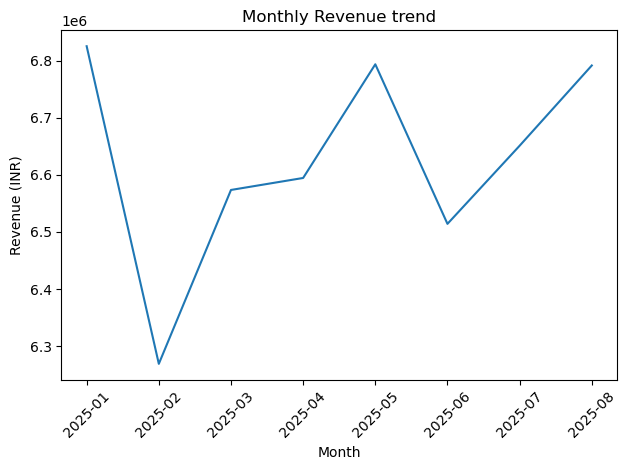

In [22]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

df["YearMonth"] = df["Order Date"].dt.to_period("M").astype(str) ##dt.to_period() is used in Pandas to convert a datetime column into a Period type (like month, year, quarter, etc.

monthly_revenue = df.groupby("YearMonth")["Price (INR)"].sum().reset_index()

plt.figure()
plt.plot(monthly_revenue["YearMonth"], monthly_revenue["Price (INR)"])
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Revenue (INR)")
plt.title("Monthly Revenue trend")
plt.tight_layout()
plt.show()

# Daily Sales Trend

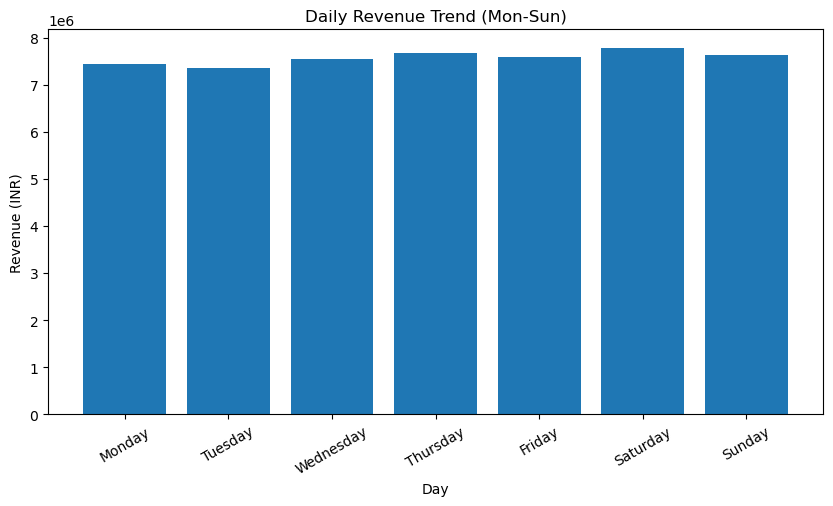

In [23]:
df["DayName"] = pd.to_datetime(df["Order Date"]).dt.day_name()

daily_revenue = (
    df.groupby("DayName")["Price (INR)"]
      .sum()
      .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
)

plt.figure(figsize=(10,5))
plt.bar(daily_revenue.index, daily_revenue.values)
plt.title("Daily Revenue Trend (Mon-Sun)")
plt.xlabel("Day")
plt.ylabel("Revenue (INR)")
plt.xticks(rotation=30)

plt.show()

# Total Sales by food Types (Veg vs Non-Veg)

In [24]:
non_veg_keywords = [
    "chicken", "egg", "fish", "mutton",
    "prawn", "biryani", "kabab", "kebab",
    "non-veg", "non veg"
]

df["Food Category"] = np.where(
    df["Dish Name"].str.lower().str.contains("|".join(non_veg_keywords), na=False),
    "Non-Veg",
    "Veg"
)


In [26]:
food_revenue = (
    df.groupby("Food Category")["Price (INR)"]
      .sum()
      .reset_index()
)

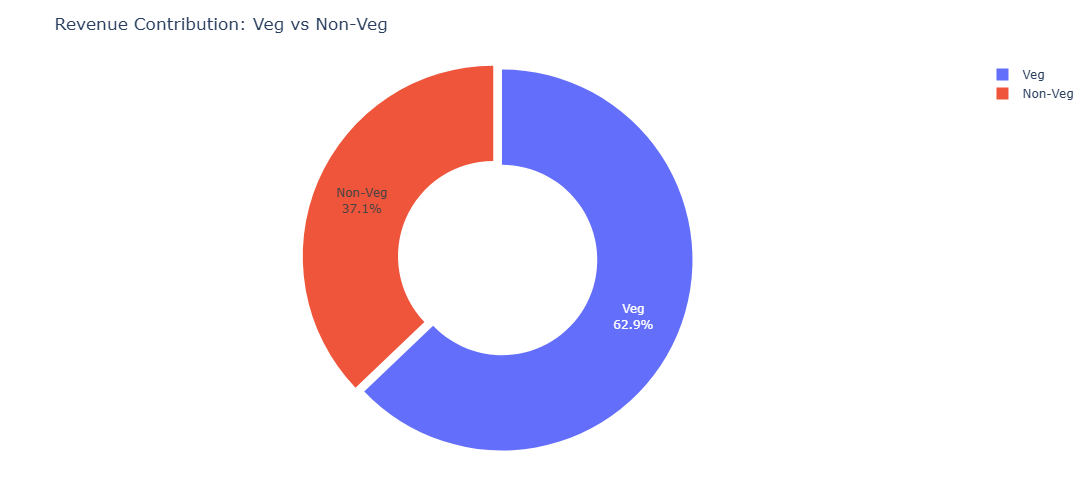

In [27]:
fig = px.pie(
    food_revenue,
    values="Price (INR)",
    names="Food Category",
    hole=0.5,
    title="Revenue Contribution: Veg vs Non-Veg"
)

fig.update_traces(
    textinfo="percent+label",
    pull=[0.05, 0]
)

fig.update_layout(
    height=500,
    margin=dict(t=60, b=40, l=40, r=40)
)

fig.show()

# Total Sales by State

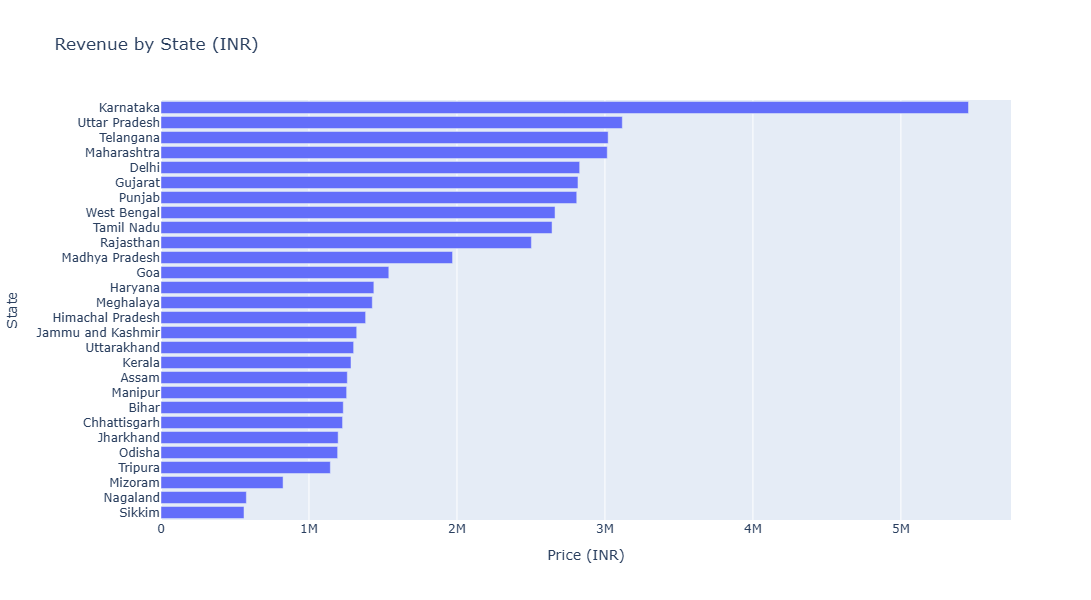

In [28]:
import plotly.express as px

fig = px.bar(
    df.groupby("State", as_index=False)["Price (INR)"].sum()
      .sort_values("Price (INR)", ascending=False),
    x="Price (INR)",
    y="State",
    orientation="h",
    title="Revenue by State (INR)"
)

fig.update_layout(
    height=600,
    yaxis=dict(autorange="reversed")
)

fig.show()


# Quarterly Performence Summary

In [29]:
import pandas as pd

# Convert Order Date to datetime
df["Order_Date"] = pd.to_datetime(df["Order Date"])

# Extract Quarter
df["Quarter"] = df["Order_Date"].dt.to_period("Q").astype(str)

# Create Quarterly Summary
quarterly_summary = (
    df.groupby("Quarter", as_index=False)
      .agg(
          Total_Sales=("Price (INR)", "sum"),
          Avg_Rating=("Rating", "mean"),
          Total_Orders=("Order_Date", "count")
      )
      .sort_values("Quarter")
)

# Round values
quarterly_summary["Total_Sales"] = quarterly_summary["Total_Sales"].round(0)
quarterly_summary["Avg_Rating"] = quarterly_summary["Avg_Rating"].round(2)

quarterly_summary


,Quarter,Total_Sales,Avg_Rating,Total_Orders
0,2025Q1,19667822.0,4.34,73096
1,2025Q2,19902257.0,4.34,74163
2,2025Q3,13442427.0,4.34,50171


# Top 5 Cities by Sales

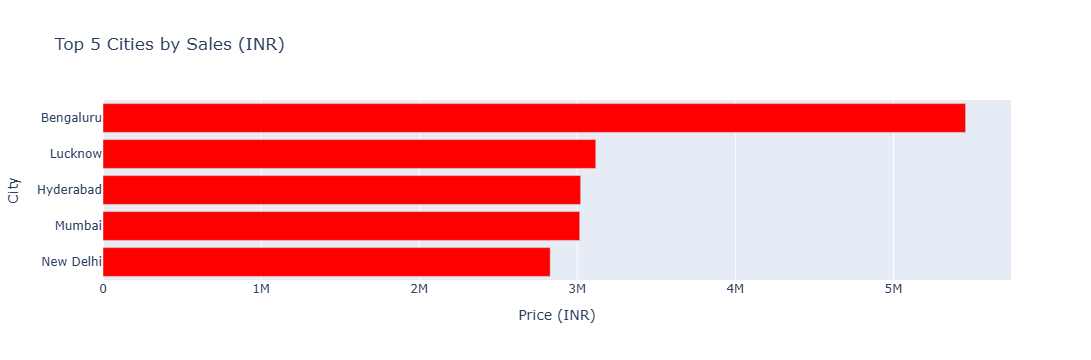

In [30]:
import plotly.express as px

# Get Top 5 Cities by Total Sales ##groupby() is used to group rows that have the same value in a column, so you can apply calculations (like sum, mean, count, etc.) to each group
top_5_cities = (
    df.groupby("City")["Price (INR)"]
      .sum()
      .nlargest(5)
      .sort_values()
      .reset_index()
)

# Create Horizontal Bar Chart
fig = px.bar(
    top_5_cities,
    x="Price (INR)",
    y="City",
    orientation="h",
    title="Top 5 Cities by Sales (INR)",
    color_discrete_sequence=["red"]
)

fig.show()
